In [28]:
import os
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

hs_blau = "#22376f"
#mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#0645ad", "#800020", "#1EB9E7", ])

# Einlesen der Bevölkerungsdaten aus Österreich

### Einlesen der Sterbefälle in Östereich über die Altersgruppen

In [29]:
#read sterbefälle pro monat
sterbefälle_altersgruppen = pd.read_excel(f"Data\\gestorbene_seit_2006_nach_altersgruppen_bearbeitet.xlsx")

#Datensatz ist selbst zusammengebaut
sterbefälle_altersgruppen = sterbefälle_altersgruppen[sterbefälle_altersgruppen.columns].replace(["-",".","X "],0)
sterbefälle_altersgruppen

,Nr.,Jahr,Alter,Männer,Frauen,Insgesamt
0,1,2006,Insgesamt,34757,39538,74295
1,2,2006,0 bis 14 Jahre,261,186,447
2,3,2006,15 bis 19 Jahre,181,62,243
3,4,2006,20 bis 24 Jahre,222,75,297
4,5,2006,25 bis 29 Jahre,183,75,258
...,...,...,...,...,...,...
250,251,2020,65 bis 69 Jahre,3607,2082,5689
251,252,2020,70 bis 74 Jahre,5069,3215,8284
252,253,2020,75 bis 79 Jahre,6970,5265,12235
253,254,2020,80 bis 84 Jahre,7809,7072,14881


### Österreich Bevölkerung

In [30]:
bevölkerung_österreich = pd.read_excel(f"Data\\table_2022-05-29_19-20-56.xlsx", index_col=0).reset_index(drop=True)
bevölkerung_österreich

,Jahr,Altersgruppen,männlich,weiblich,Insgesamt
0,2002,bis 14 Jahre,689766,656006,1345772
1,2002,15 bis 19 Jahre,246631,235420,482051
2,2002,20 bis 24 Jahre,244102,236895,480997
3,2002,25 bis 29 Jahre,263353,264940,528293
4,2002,30 bis 34 Jahre,331851,327188,659039
...,...,...,...,...,...
395,2021,85 bis 89 Jahre,50820,89646,140466
396,2021,90 bis 94 Jahre,19894,45781,65675
397,2021,95 bis 99 Jahre,3396,12902,16298
398,2021,100 Jahre und älter,218,1203,1421


### Deutschland Bevölkerung

In [31]:
deutsch_bevölkerung = pd.read_excel(f"Data\\12411-0012_complete.xlsx", index_col=0).reset_index(drop=True)
deutsch_bevölkerung

,Jahr,Alter,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,Gesamt
0,1990,unter 1 Jahr,119162,136550,41485,29040,6851,16629,62328,23291,83095,199981,43012,11215,49556,31411,29179,28657,911442
1,1990,1-Jährige,114672,129986,38824,31792,6552,15550,60670,25424,79748,192662,41210,10950,53584,33451,28288,30488,893851
2,1990,2-Jährige,116459,130981,39899,34300,6537,15772,60841,27284,81154,195867,42553,11180,56712,36113,28726,33405,917783
3,1990,3-Jährige,110080,124102,38900,35986,6235,14534,58403,29125,77700,188769,41173,10953,59380,37339,27379,34428,894486
4,1990,4-Jährige,109664,123680,37737,35290,6026,13868,56944,28284,76474,184442,40529,10981,58300,36631,26005,34154,879009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,2020,87-Jährige,38312,43512,10243,10105,2244,5301,20549,6791,27702,62723,14619,3985,17717,9317,9953,8377,291450
2848,2020,88-Jährige,33330,38699,8576,8811,1938,4580,18106,6091,24439,55507,12764,3583,15081,8137,8488,7415,255545
2849,2020,89-Jährige,29520,33392,7694,7667,1749,4168,15998,5061,22048,49406,11429,3179,13748,7079,7715,6428,226281
2850,2020,90 Jahre und mehr,108225,122252,30029,26464,7160,17250,62984,16715,83231,184859,43862,10966,51868,24957,29586,23283,843691


In [32]:
#alle Altersgruppen einteilen
rows = []
x = 0
j = 0
for k in range (1 ,32):
    x=0
    for i in range(0, 92):
        k2 = k*91
        if i == 0 and k == 1:
            bevölkerungs_anzahl = deutsch_bevölkerung.loc[deutsch_bevölkerung.index[0]]["Gesamt"] #Gesamtbevölkerung je altersgruppe
        if i == 0 and k != 1:
            bevölkerungs_anzahl = deutsch_bevölkerung.loc[deutsch_bevölkerung.index[i+(k-1)*92]]["Gesamt"]
        else:
            bevölkerungs_anzahl = deutsch_bevölkerung.loc[deutsch_bevölkerung.index[i+((k-1)*92)]]["Gesamt"]

        if ( i < 15):
            x += bevölkerungs_anzahl
            if (i == 14):
                rows.append([1990+k-1,"0 - "+"<{}".format(i+1), x])
                x = 0

        elif (i >= 15 and  i < 85):
            j += 1
            x += bevölkerungs_anzahl
            if j == 5:
                rows.append([1990+k-1,(str(i-4)+" - <"+str(i+1)), x])
                j = 0
                x = 0

        elif (i >= 85 and  i <= 90):
            x += bevölkerungs_anzahl
            if i == 90:
                rows.append([1990+k-1,"85<", x])
                x = 0

        elif i == 91:
            x += bevölkerungs_anzahl
            rows.append([1990+k-1,"Gesamt", x])
            x=0


alters_gruppen_deutsch = pd.DataFrame(rows, columns=["Jahr","Alter", "Anzahl"])
alters_gruppen_deutsch

,Jahr,Alter,Anzahl
0,1990,0 - <15,12937503
1,1990,15 - <20,4369092
2,1990,20 - <25,6318534
3,1990,25 - <30,7004877
4,1990,30 - <35,6249072
...,...,...,...
522,2020,70 - <75,3968070
523,2020,75 - <80,3468028
524,2020,80 - <85,3430502
525,2020,85<,2505932


#### Einteilen der Bevölkerungsdaten

In [33]:
#Sterbefälle einteilen
#bildet summe aus gruppe 90-95 und gruppe ü 95, ersetzt die 90-95 row damit, benennt sie um und dropt die ü95 reihe.

#Auswählen der gewünschten Spalten
alter_85_bis_89 = bevölkerung_österreich.loc[bevölkerung_österreich["Altersgruppen"]=="85 bis 89 Jahre"]
alter_90_bis_94 = bevölkerung_österreich.loc[bevölkerung_österreich["Altersgruppen"]=="90 bis 94 Jahre"]
alter_95_bis_99 = bevölkerung_österreich.loc[bevölkerung_österreich["Altersgruppen"]=="95 bis 99 Jahre"]
alter_100_und_mehr = bevölkerung_österreich.loc[bevölkerung_österreich["Altersgruppen"]=="100 Jahre und älter"]

#Aufsummieren der Zeilen
index_85_bis_89 = list(alter_85_bis_89.index)
index_90_bis_94 = list(alter_90_bis_94.index)
index_95_bis_99 = list(alter_95_bis_99.index)
index_100_und_mehr = list(alter_100_und_mehr.index)

for i in range (len(index_85_bis_89)):
    new_row = alter_85_bis_89.iloc[i,2:] + alter_90_bis_94.iloc[i,2:] + alter_95_bis_99.iloc[i,2:] + alter_100_und_mehr.iloc[i,2:]
    bevölkerung_österreich.loc[index_85_bis_89[i], "männlich":] = new_row
    bevölkerung_österreich.drop([index_90_bis_94[i],index_95_bis_99[i],index_100_und_mehr[i]], inplace=True)

bevölkerung_österreich['Altersgruppen'].replace({'85 bis 89 Jahre': '85<'}, inplace = True)

In [34]:
bevölkerung_österreich

,Jahr,Altersgruppen,männlich,weiblich,Insgesamt
0,2002,bis 14 Jahre,689766,656006,1345772
1,2002,15 bis 19 Jahre,246631,235420,482051
2,2002,20 bis 24 Jahre,244102,236895,480997
3,2002,25 bis 29 Jahre,263353,264940,528293
4,2002,30 bis 34 Jahre,331851,327188,659039
...,...,...,...,...,...
392,2021,70 bis 74 Jahre,189301,222212,411513
393,2021,75 bis 79 Jahre,149676,192335,342011
394,2021,80 bis 84 Jahre,115999,162246,278245
395,2021,85<,74328,149532,223860


# Altersbereinigung der Sterbefälle aus Österreich mithilfe der deutschen Standardpopulation

#### Berechnung der rohen Sterberate

In [35]:
#rohe sterberate
#loop über jahre
sterberaten_roh = []
for n in range(0,15):
    z = sterbefälle_altersgruppen.loc[(sterbefälle_altersgruppen["Jahr"]==2020-n)].reset_index(drop= True)
    sterberate_gesamt = 0

    # gesamt_bev = standard_bevölkerung.loc[standard_bevölkerung.index[15]][2]
    gesamt_bev = bevölkerung_österreich.loc[bevölkerung_österreich["Jahr"]==2020-n]["Insgesamt"].reset_index(drop= True)

    #loop über altersgruppen
    for i in range(1,17):
        mri = ((z.loc[z.index[i]]["Insgesamt"]) / gesamt_bev[16]) * 100000  #sterberate je altersgruppe
        sterberate_gesamt += mri


    sterberaten_roh.append([2020-n, sterberate_gesamt])
    sterberate_gesamt = 0

sterberaten_roh = pd.DataFrame(sterberaten_roh, columns=["Jahr", "Sterberate_Roh_pro_100000"])
sterberaten_roh

,Jahr,Sterberate_Roh_pro_100000
0,2020,1029.079220
1,2019,941.281385
2,2018,951.852851
3,2017,949.176808
4,2016,927.179689
5,2015,967.661224
6,2014,919.769256
7,2013,940.928979
8,2012,944.753293
9,2011,913.164208


### Altersbereinigte Sterberate (Standardbevölkerung: 2020)

Auswahl der Standardbevölkerung

In [36]:
standard_bevölkerung = alters_gruppen_deutsch.loc[alters_gruppen_deutsch["Jahr"]==2020]
standard_bevölkerung

,Jahr,Alter,Anzahl
510,2020,0 - <15,11477800
511,2020,15 - <20,3856774
512,2020,20 - <25,4570491
513,2020,25 - <30,4912939
514,2020,30 - <35,5581088
515,2020,35 - <40,5290876
516,2020,40 - <45,5034888
517,2020,45 - <50,5035860
518,2020,50 - <55,6487224
519,2020,55 - <60,6817318


In [80]:
standard_bevölkerung.loc[standard_bevölkerung.index[16]][2] #Deutsch

83155031

In [82]:
#altersbereinigt
sterberaten_bereinigt = []
#loop über jahre
for n in range(0,15):
    z = sterbefälle_altersgruppen.loc[(sterbefälle_altersgruppen["Jahr"]==2020-n)] #Österreich
    q = bevölkerung_österreich.loc[bevölkerung_österreich["Jahr"]==2020-n] #Österreich
    gesamt_bev = standard_bevölkerung.loc[standard_bevölkerung.index[16]][2] #Deutsch
    erg_sum = 0
    sum = 0

    #loop über Altersgruppen
    for i in range(0,16):
        asx = standard_bevölkerung.loc[standard_bevölkerung.index[i]][2] #bevölkerung je altersgruppe Standardbevölkerung
        bevölkerung_grp = q.loc[q.index[i]][4] #größe Bevölkerungsruppe untersuchte Bevölkerung
        subx = ((z.loc[z.index[i+1]]["Insgesamt"]) / bevölkerung_grp) * 100000 #sterberate je altersgruppe
        sum += (asx * subx)

    erg = sum / gesamt_bev
    erg_sum += erg

    sterberaten_bereinigt.append([2020-n, erg_sum])

sterberaten_bereinigt = pd.DataFrame(sterberaten_bereinigt, columns=["Jahr", "Sterberate_bereinigt"])
sterberaten_bereinigt

,Jahr,Sterberate_bereinigt
0,2020,1208.386443
1,2019,1121.518767
2,2018,1142.991848
3,2017,1149.662777
4,2016,1132.523083
5,2015,1187.634373
6,2014,1142.883523
7,2013,1183.266445
8,2012,1199.729171
9,2011,1181.062066


AttributeError: 'DataFrame' object has no attribute 'Sterberate_Roh'

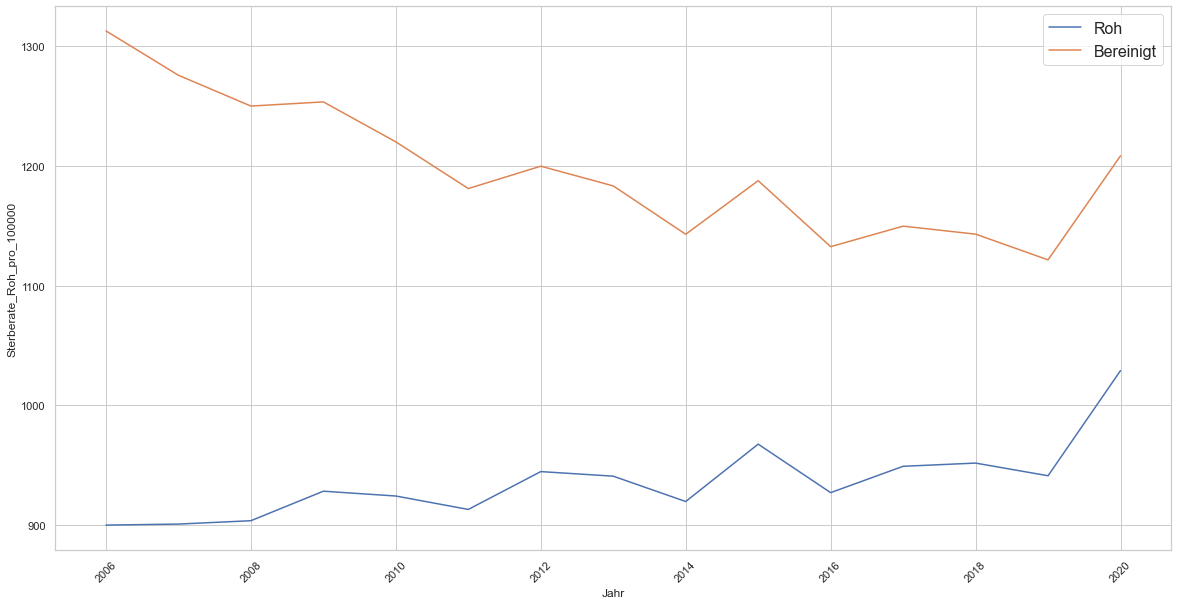

In [86]:
xticks = [i for i in range(2006,2021)]

ax = sns.lineplot(x="Jahr",  y='Sterberate_Roh_pro_100000', data=sterberaten_roh)
sns.lineplot(ax=ax, x="Jahr",  y='Sterberate_bereinigt', data=sterberaten_bereinigt)
plt.legend(labels=['Roh','Bereinigt'],fontsize= 16)
sns.set_theme(style="whitegrid")
plt.xticks(rotation=45)
plt.gcf().set_size_inches(20, 10)

grippe_wellen = [2009,2013,2015,2018,2020]

